불균형 데이터로 인해 TP와 TN 중 TP가 너무 적어서 TN만으로 확인이 된다면 이것이 과연 정확한 것이 맞는가?

Roc, Auc --> FPR   
FPR이 변할 때 결국 TPR이 어떻게 변하는지가 ROC 곡선을 의미하는 것   

TPR(True postive rate) : TP / (FN + TP) --> 재현율, 민감도   
민감도에 대응하는 지표가 TNR(특이성)   
TNR(특이성) : TN / (FP + TN)   

FPR : FP / (FP + TN) 이므로 1 - TNR이 FPR이다   

민감도: 실제값 pos가 정확히 예측되어야 하는 수준   
특이성: 실제값 Neg 정확히 예측되어야 하는 수준   

가운데 random 빨간선은 무작위로 던졌을 때 최소 0.5   
0, 1을 예측하는 이진 분류에서 최소한 0.5 이상은 되어야 잘 된 모델이라고 볼 수 있는 기준이다   
0.5 밑으로 떨어지는 경우는 잘못된 모델이라 생각하고 다시 분석이나 모델링을 해야 한다   

"임계값을 바꾸면서 진행한다"는 의미   
FPR 0을 0을 만드려면, x축이므로 임계값을 1로 지정해야 한다   
임계값을 1로 지정해야 된다는 것은 ㅐ, 1 중에서 0.5가 아니라 1이어야 한다는 것이니   
Positive에 대한 예측 기준이 매우 높아진다   
임계값 높은 확률은 예측할 수 없다   

반대로 FPR이 1이 되려면, TN이 0이 되어야 한다 (정의에 따라)   
TN을 0으로 만든다는 것은 실제값 자체가 0인데 예측도 0이라는 것이 0이라는 것을 의미한다   
즉, 임계값을 0으로 지정한다 --> Negative에 대한 값이 없어질테니 FPR이 1이 된다   


In [9]:
# 필요한 라이브러리 import

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
df = sns.load_dataset('titanic')

In [5]:
df = df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']]
df.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [6]:
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [7]:
df.dropna(inplace=True)

C:\Users\rlehd\AppData\Local\Temp\ipykernel_8988\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


## Titanic data를 LR 모델로 학습하여 혼동 행렬과 평가 지표들을 출력 

In [15]:
data = df.drop(['survived'], axis=1)    # 학습 데이터에 label이 포함되지 않도록 주의한다
label = df.survived
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=111)

In [16]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred) # 실제값과 예측값을 인자로 넣는다
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    print("오차 행렬")
    print(confusion)
    print("정확도: {:0.4f}, 정밀도: {:0.4f}, 재현율: {:0.4f}".format(accuracy, precision, recall))

In [17]:
Ir_clf = LogisticRegression(solver='liblinear')
Ir_clf.fit(X_train, y_train)
pred = Ir_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[110  25]
 [ 43  37]]
정확도: 0.6837, 정밀도: 0.5968, 재현율: 0.4625


## predict_proba : predict에 사용된 확률(probability)

In [25]:
# predict_proba: 각각의 predict(이진 분류에서는 0 or 1로 예측)에 각 class별로 어떤 확률로 예측한 것인지를 출력해주는 메소드

pred_proba = Ir_clf.predict_proba(X_test)
pred = Ir_clf.predict(X_test)
print('pred_proba()결과 shape:{}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출:\n', pred_proba[:3], '\n')

#예측 확률 array와 예측 결과값 array를 병합하여(concatenate) 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1) # pred_proba에 pred를 1열로 만들어서 axis=1로 뒤의 열로 붙여준다 
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n    0일 확률   1일 확률   pred  \n', pred_proba_result[:10])

pred_proba()결과 shape:(215, 2)
pred_proba array에서 앞 3개만 샘플로 추출:
 [[0.6740679  0.3259321 ]
 [0.71699779 0.28300221]
 [0.53595107 0.46404893]] 

두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
    0일 확률   1일 확률   pred  
 [[0.6740679  0.3259321  0.        ]
 [0.71699779 0.28300221 0.        ]
 [0.53595107 0.46404893 0.        ]
 [0.59012026 0.40987974 0.        ]
 [0.83845905 0.16154095 0.        ]
 [0.24819866 0.75180134 1.        ]
 [0.78488735 0.21511265 0.        ]
 [0.48733129 0.51266871 1.        ]
 [0.3954015  0.6045985  1.        ]
 [0.33682491 0.66317509 1.        ]]


## Binarizer를 이용한 변환 : 임계값을 기준으로 예측값을 조정 

In [26]:
from sklearn.preprocessing import Binarizer # 주어진 임계값(threshold)를 기준으로 수치형 데이터를 이진값(0 or 1)로 변환하는데 사용되는 변환기(transformer)

X= [[ 1, -1, 2],
    [ 2, 0, 0],
    [0, 1.1, 1.2]]

binarizer = Binarizer(threshold=1.1) # 각 원소가 threshold보다 크면 1, 작거나 같으면 0을 반환
print(binarizer.fit_transform(X))    # 주어진 데이터를 학습하고 그 결과를 바탕으로 데이터를 변환하여

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [27]:
custom_threshold = 0.5

#predict_proba() 반환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[110  25]
 [ 43  37]]
정확도: 0.6837, 정밀도: 0.5968, 재현율: 0.4625


In [28]:
#Binarizer의 threshold 설정값을 0.5에서 0.4로 낮춤. 
custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[94 41]
 [30 50]]
정확도: 0.6698, 정밀도: 0.5495, 재현율: 0.6250


## 임계값 변화에 따른 평가지표의 변화를 관측 

In [31]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds list 객체 내의 값을 차례로 iteration 하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        print()
    
        
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[94 41]
 [30 50]]
정확도: 0.6698, 정밀도: 0.5495, 재현율: 0.6250

임곗값: 0.45
오차 행렬
[[100  35]
 [ 38  42]]
정확도: 0.6605, 정밀도: 0.5455, 재현율: 0.5250

임곗값: 0.5
오차 행렬
[[110  25]
 [ 43  37]]
정확도: 0.6837, 정밀도: 0.5968, 재현율: 0.4625

임곗값: 0.55
오차 행렬
[[119  16]
 [ 45  35]]
정확도: 0.7163, 정밀도: 0.6863, 재현율: 0.4375

임곗값: 0.6
오차 행렬
[[123  12]
 [ 50  30]]
정확도: 0.7116, 정밀도: 0.7143, 재현율: 0.3750



## precision_recall_curve(실제값, 예측 확률) : 실제값과 예측 확률을 입력으로 받아 여러 임계값에서의 정밀도와 재현율 값을 반환한다

In [32]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일때 예측확률을 추출
pred_proba_class1 = Ir_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 shape:', thresholds.shape)

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 step으로 추출
thr_index = np.arange(0,thresholds.shape[0],15) # 0 ~ 210(미포함)을 15step으로
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index],2))

#15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도:', np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율:', np.round(recalls[thr_index],3))

반환된 분류 결정 임곗값 배열의 shape: (210,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150 165 180 195]
샘플용 10개의 임곗값: [0.06 0.18 0.22 0.25 0.28 0.29 0.32 0.35 0.4  0.46 0.51 0.57 0.68 0.86]
샘플 임계값별 정밀도: [0.372 0.395 0.422 0.435 0.468 0.496 0.528 0.546 0.554 0.56  0.617 0.733
 0.7   0.667]
샘플 임계값별 재현율: [1.    0.988 0.975 0.925 0.9   0.862 0.812 0.738 0.638 0.525 0.462 0.412
 0.262 0.125]


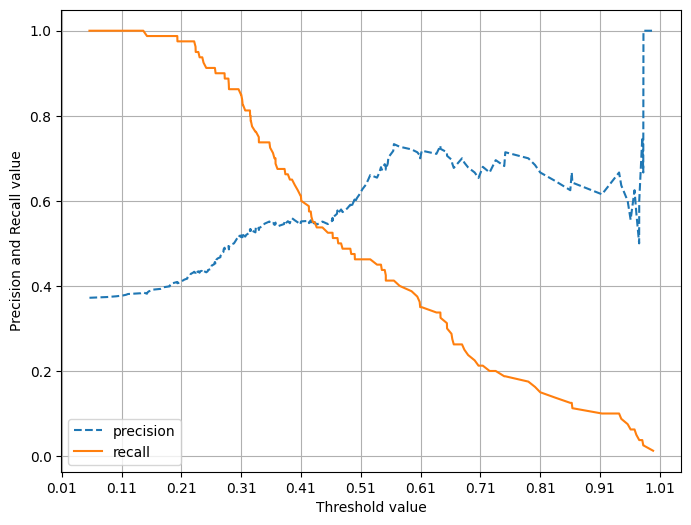

In [46]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # thredshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출 
    precision, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)  # 실제값과 1로 예측할 확률로 여러 임계값에서의 precision과 recall을 계산
    
    #X축을 thredshold 값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시 
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0] # 임계값의 개수와 precision, recall 개수를 맞추기 위해 임계값의 행의 개수를 추출
    plt.plot(thresholds, precision[0:threshold_boundary], linestyle='--', label='precision') # precision 그래프 그리기
    plt.plot(thresholds, recalls[0:threshold_boundary], label ='recall')                     # recall 그래프 그리기
    
    #thredshold 값 X축 Scale을 0.1단위로 변경(없으면 0.2씩 자동으로 그려졌다)
    start, end = plt.xlim() # 0 ~ 1로 자동으로 책정된 x축의 scale을 가져와서
    plt.xticks(np.round(np.arange(start, end, 0.1),2))  # 0부터 1까지 0.1씩 증가하도록 xticks를 변경(step을 바꾸는 만큼 더 세밀하게 그래프 그릴 수 있음)
    
    plt.xlabel('Threshold value');           # x축 설명
    plt.ylabel('Precision and Recall value') # y축 설명
    plt.legend();                            # 범례 출력
    plt.grid()                               # 격자 출력
    plt.show()                               # 출력
    
precision_recall_curve_plot(y_test, Ir_clf.predict_proba(X_test)[:,1]) # 실제값과 1로 예측할 확률을 인자로 넣음

## f1_score : 평가지표 중 하나로 정밀도와 재현율의 조화 평균을 의미함 

In [34]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어:{0:.4f}'.format(f1))

F1 스코어:0.5211


In [35]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    #F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가 
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f},F1:{3:.4f}'.format(accuracy, precision, recall, f1))
    
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = Ir_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[94 41]
 [30 50]]
정확도:0.6698, 정밀도:0.5495, 재현율:0.6250,F1:0.5848

임곗값: 0.45
오차 행렬
[[100  35]
 [ 38  42]]
정확도:0.6605, 정밀도:0.5455, 재현율:0.5250,F1:0.5350

임곗값: 0.5
오차 행렬
[[110  25]
 [ 43  37]]
정확도:0.6837, 정밀도:0.5968, 재현율:0.4625,F1:0.5211

임곗값: 0.55
오차 행렬
[[119  16]
 [ 45  35]]
정확도:0.7163, 정밀도:0.6863, 재현율:0.4375,F1:0.5344

임곗값: 0.6
오차 행렬
[[123  12]
 [ 50  30]]
정확도:0.7116, 정밀도:0.7143, 재현율:0.3750,F1:0.4918



## roc_curve(실제값, 예측 확률) : 이진 분류 모델의 성능을 평가하기 위한 Receiver Operating Characteristic(ROC) 곡선을 생성

ROC 곡선 = 임계값(threshold)을 1부터 0까지 변화시키면서 FPR(x축)을 구하고 FPR의 변화에 따른 TPR값을 구하는 것   
특이도(Specificity) = FPR(false positive rate) = FP / (FP + FN)    
민감도(Sensitivity) = TPR(True  positive rate) = TP / (TP + FN) :    

In [36]:
from sklearn.metrics import roc_curve

#레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = Ir_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
#반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출
#thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작 
thr_index = np.arange(1, thresholds.shape[0],5)

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값:', np.round(thresholds[thr_index],2))

# 5step 단위로 추출된 임계값에 따른 TPR, FPR 값
print('샘플 임곗값별 FPR:', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR:', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51 56 61 66 71 76 81 86 91]
샘플 index로 추출한 임곗값: [1.   0.97 0.86 0.71 0.64 0.55 0.5  0.48 0.46 0.43 0.4  0.37 0.36 0.33
 0.31 0.3  0.28 0.25 0.2 ]
샘플 임곗값별 FPR: [0.    0.022 0.044 0.059 0.081 0.119 0.185 0.215 0.259 0.274 0.304 0.341
 0.356 0.415 0.452 0.489 0.556 0.711 0.844]
샘플 임곗값별 TPR: [0.012 0.062 0.125 0.212 0.338 0.438 0.462 0.5   0.525 0.575 0.65  0.675
 0.738 0.788 0.825 0.862 0.9   0.938 0.975]


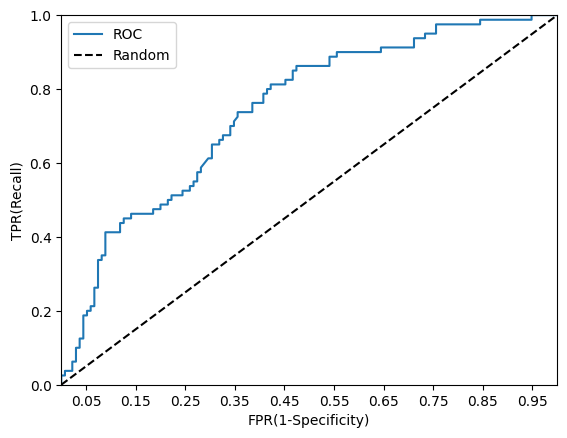

In [37]:
def roc_curve_plot(y_test, pred_proba_c1):
    #임곗값에 따른 FPR, TPR값을 반환받음.
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    #ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    #가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    #FPR X축의 Scale을 0.1 단위로 변경, X,Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    plt.xlabel('FPR(1-Specificity)');plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:,1])

In [38]:
from sklearn.metrics import roc_auc_score

pred_proba = Ir_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값:{0:.4f}'.format(roc_score))

ROC AUC 값:0.7425
